# Healthcare.ai Diabetes Example

## Step 1: Load training data

### Import the healthcare.ai package

In [1]:
%matplotlib inline
import healthcareai
import healthcareai.trained_models.trained_supervised_model as tsm_plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

### Data Loading Examples

In [ ]:
# Option 1
# dataframe = healthcareai.load_diabetes()

# Option 2
# dataframe = healthcareai.load_csv('path/to/your.csv')

# Option 3
#engine = hcai_db.build_mssql_engine_using_trusted_connections(server='localhost', database='Clinical')
#dataframe = pd.read_sql('SELECT * FROM DiabetesClinicalSamples', engine)

### Load the sample diabetes data set

In [2]:
dataframe = healthcareai.load_diabetes()
dataframe.head()

,PatientEncounterID,PatientID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,ThirtyDayReadmitFLG
0,1,10001,167.0,195.0,4.2,M,N
1,2,10001,153.0,214.0,5.0,M,N
2,3,10001,170.0,191.0,4.0,M,N
3,4,10002,187.0,135.0,4.4,M,N
4,5,10002,188.0,125.0,4.3,M,N


### Drop columns that won't help machine learning

In [3]:
dataframe.drop(['PatientID'], axis=1, inplace=True)
dataframe.head()

,PatientEncounterID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,ThirtyDayReadmitFLG
0,1,167.0,195.0,4.2,M,N
1,2,153.0,214.0,5.0,M,N
2,3,170.0,191.0,4.0,M,N
3,4,187.0,135.0,4.4,M,N
4,5,188.0,125.0,4.3,M,N


### Inspect the data

In [4]:
dataframe.groupby('ThirtyDayReadmitFLG').count().iloc[:, 0:1]

,PatientEncounterID
ThirtyDayReadmitFLG,
N,836
Y,154


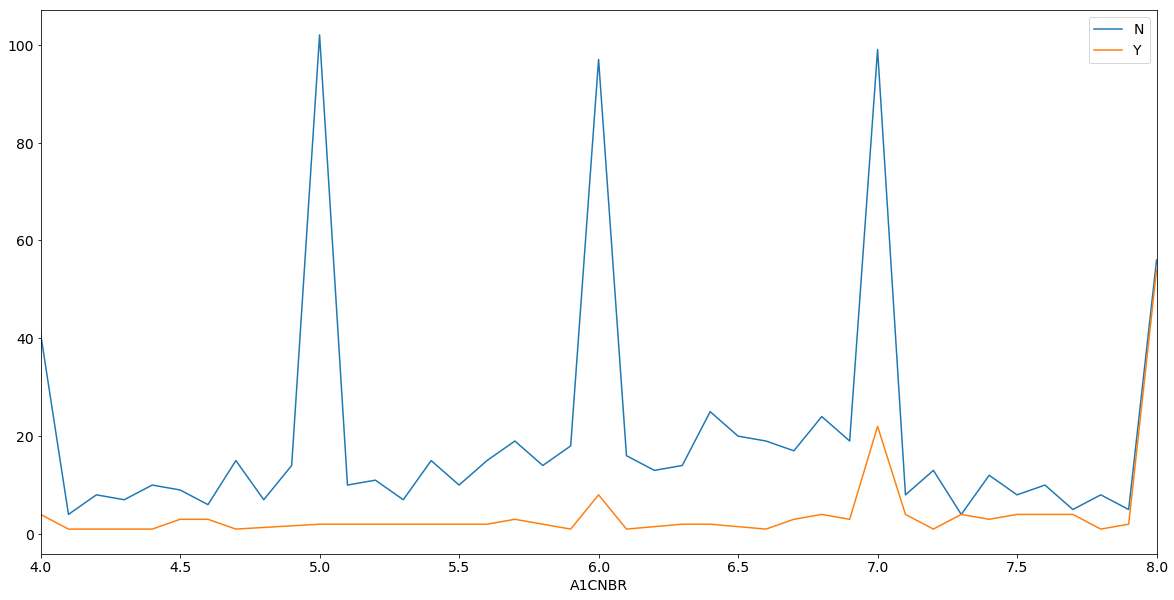

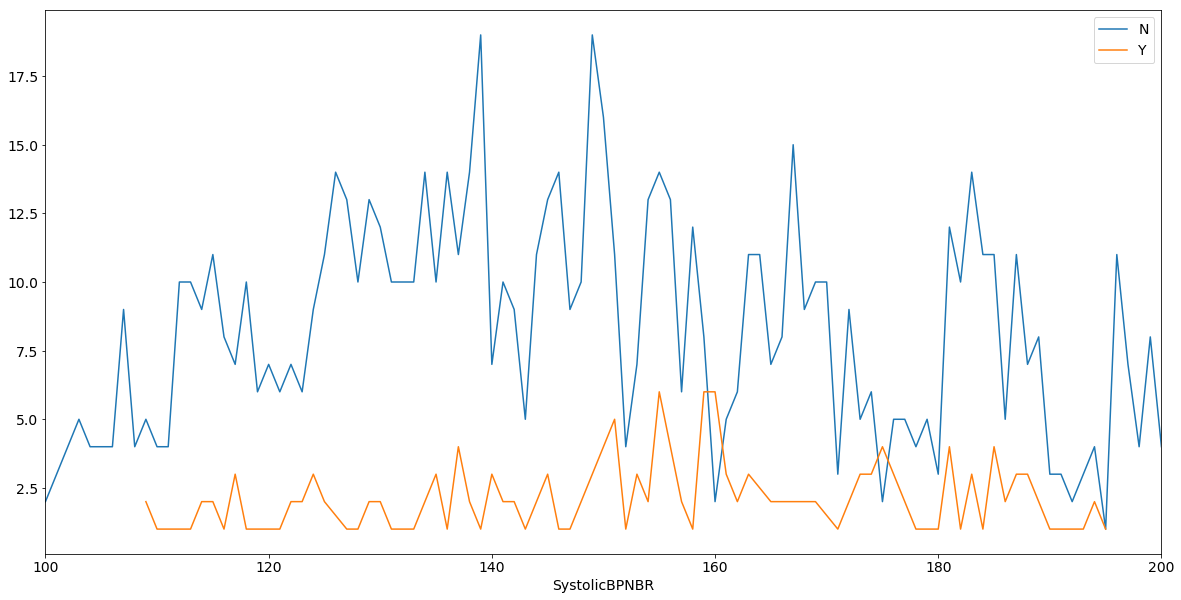

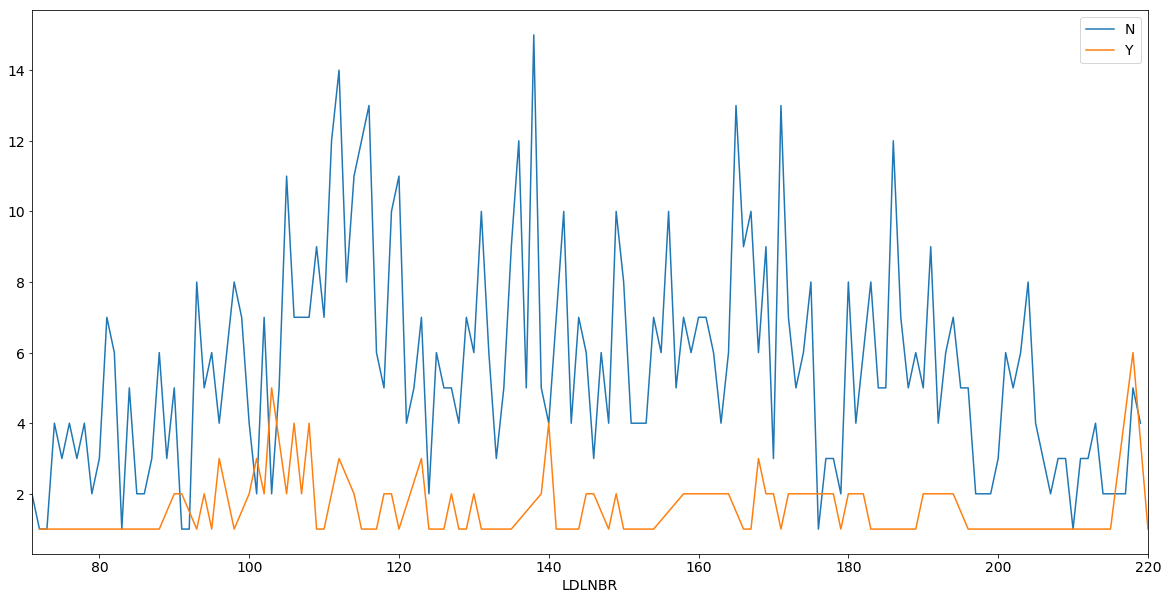

In [5]:
for col in ['A1CNBR', 'SystolicBPNBR', 'LDLNBR']:
    fig, ax = plt.subplots()
    groups = dataframe[[col, 'ThirtyDayReadmitFLG']].groupby('ThirtyDayReadmitFLG')
    for key, group in groups:
        group.groupby(col).count().plot(label='key', ax=ax)
    ax.legend(groups.groups.keys())

## Step 2: Set up a model trainer

### Set up a supervised model trainer

The SupervisedModelTrainer class helps you train models. It cleans and prepares the data before model creation. It also assigns parameters specific to the type of model you eventually want (regression or classification). 

In [6]:
classification_trainer = healthcareai.SupervisedModelTrainer(
    dataframe=dataframe,
    predicted_column='ThirtyDayReadmitFLG',
    model_type='classification',
    grain_column='PatientEncounterID',
    impute=True,
    verbose=False)

classification_trainer.clean_dataframe.head()

,SystolicBPNBR,LDLNBR,A1CNBR,ThirtyDayReadmitFLG,GenderFLG.M
0,167.0,195.0,4.2,0,1
1,153.0,214.0,5.0,0,1
2,170.0,191.0,4.0,0,1
3,187.0,135.0,4.4,0,1
4,188.0,125.0,4.3,0,1


## Step 3: Train some models

### Train a Logistic Regression model

Logistic regression is a technique borrowed by machine learning from the field of statistics. It is the go-to method for binary classification problems. It is named for the function used at the core of the method, the logistic function.

In [7]:
trained_lr = classification_trainer.logistic_regression()


Training Logistic Regression
LogisticRegression Training Results:
- Training time:
    Trained the LogisticRegression model in 0.03 seconds
- Best hyperparameters found were:
    N/A: No hyperparameter search was performed
- LogisticRegression performance metrics:
    Accuracy: 0.88
    ROC AUC: 0.68
    PR AUC: 0.24


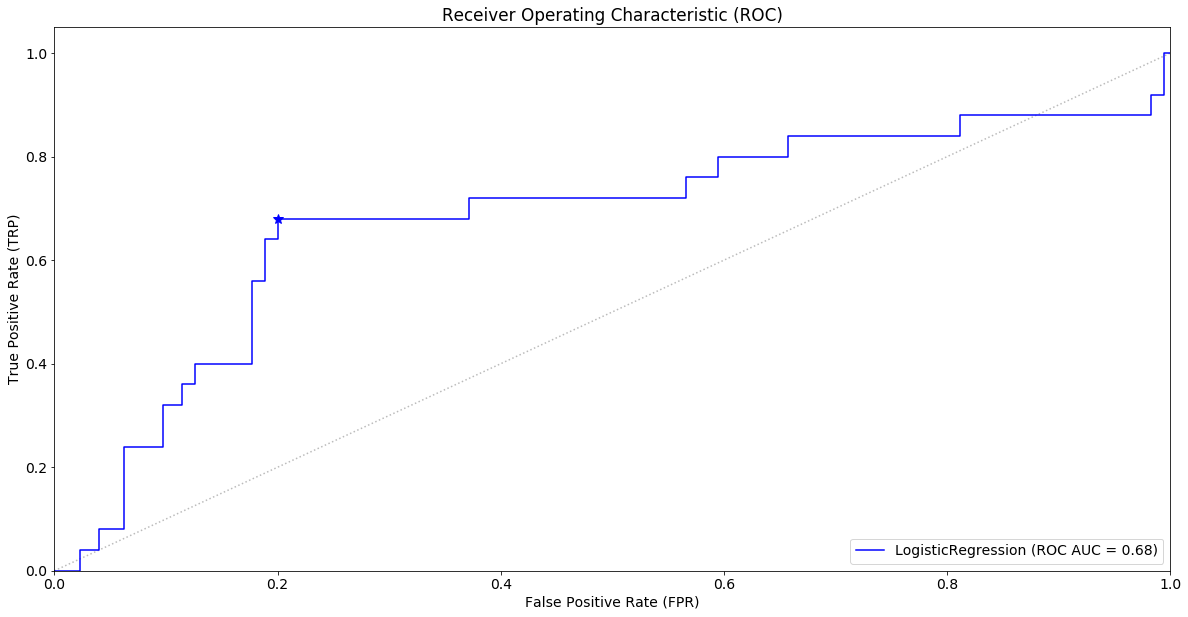

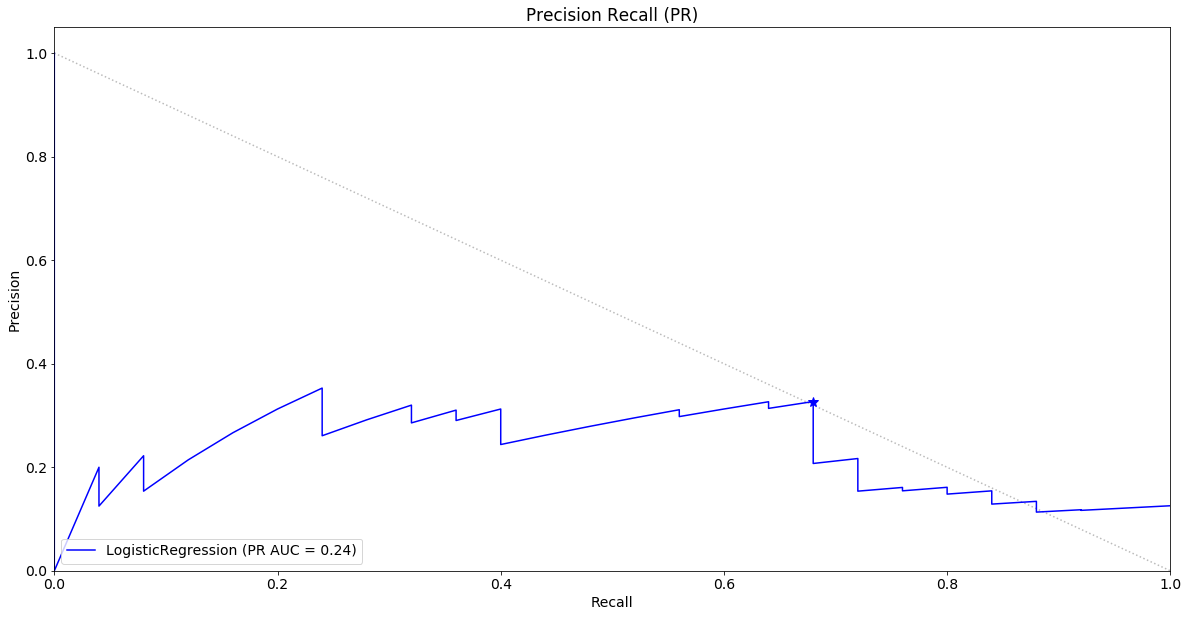

In [8]:
trained_lr.roc_plot()
trained_lr.pr_plot()

### Train a KNN model

K-nearest neighbors is a classification (or regression) algorithm that in order to determine the classification of a point, combines the classification of the K nearest points. It is supervised because you are trying to classify a point based on the known classification of other points.

In [9]:
trained_knn = classification_trainer.knn()


Training KNN
KNN Grid: {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']}
KNeighborsClassifier Training Results:
- Training time:
    Trained the KNeighborsClassifier model in 0.4 seconds
- Best hyperparameters found were:
    {'weights': 'distance', 'n_neighbors': 6}
- KNeighborsClassifier performance metrics:
    Accuracy: 0.84
    ROC AUC: 0.63
    PR AUC: 0.27


In [ ]:
trained_knn.roc_plot()
trained_knn.pr_plot()

### Train a Random Forest model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


Training Random Forest Classification
RandomForestClassifier Training Results:
- Training time:
    Trained the RandomForestClassifier model in 9.22 seconds
- Best hyperparameters found were:
    {'n_estimators': 100, 'max_features': 1}
- RandomForestClassifier performance metrics:
    Accuracy: 0.89
    ROC AUC: 0.83
    PR AUC: 0.54


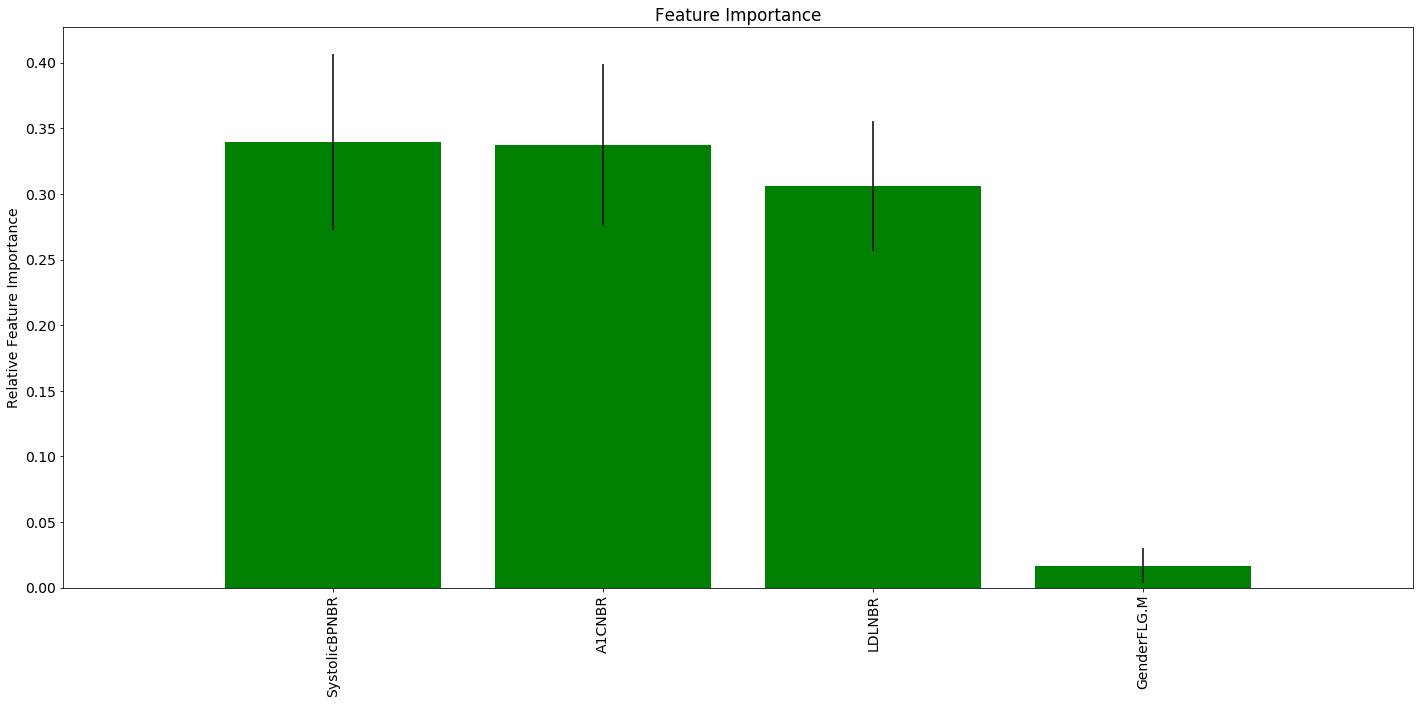

In [10]:
trained_random_forest = classification_trainer.random_forest()

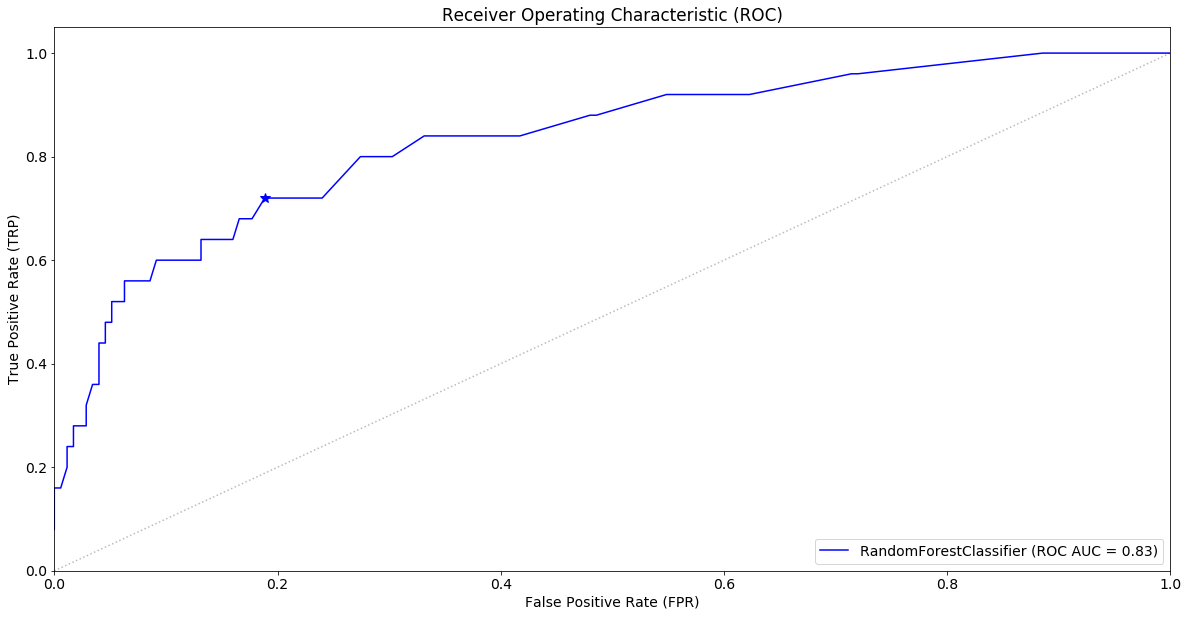

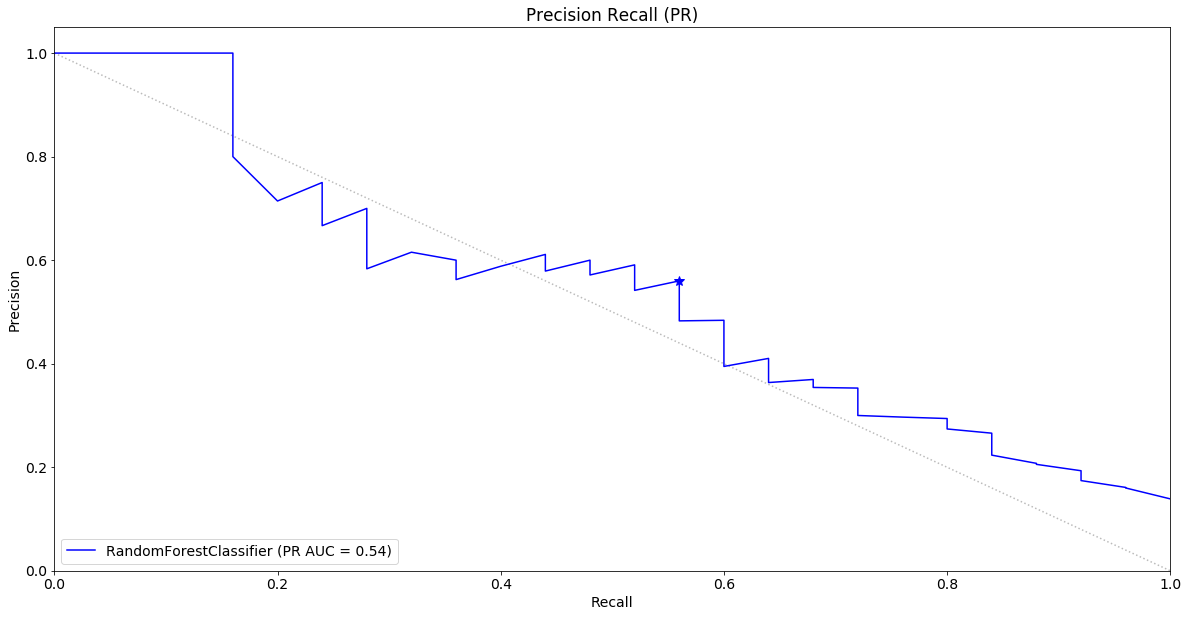

{'accuracy': 0.88500000000000001,
 'best_false_positive_rate': 0.18857142857142858,
 'best_pr_cutoff': 0.32000000000000001,
 'best_precision': 0.56000000000000005,
 'best_recall': 0.56000000000000005,
 'best_roc_cutoff': 0.14000000000000001,
 'best_true_positive_rate': 0.71999999999999997,
 'false_positive_rates': array([ 0.        ,  0.        ,  0.00571429,  0.01142857,  0.01142857,
         0.01714286,  0.01714286,  0.02857143,  0.02857143,  0.03428571,
         0.04      ,  0.04      ,  0.04571429,  0.04571429,  0.05142857,
         0.05142857,  0.06285714,  0.06285714,  0.08571429,  0.09142857,
         0.10285714,  0.12571429,  0.13142857,  0.13142857,  0.13714286,
         0.16      ,  0.16571429,  0.17714286,  0.18857143,  0.19428571,
         0.21142857,  0.21714286,  0.24      ,  0.27428571,  0.29714286,
         0.30285714,  0.33142857,  0.33714286,  0.35428571,  0.36      ,
         0.41142857,  0.41714286,  0.48      ,  0.48571429,  0.54857143,
         0.62285714,  0.7142

In [14]:
trained_random_forest.roc_plot()
trained_random_forest.pr_plot()
trained_random_forest.metrics

## Step 4: Evaluate and compare models

We evaluate and compare models to know when they are ready for production and to get an overall sense of how much we should trust them. 

### Create a list of models to compare

In [12]:
models_to_compare = [trained_knn, trained_lr, trained_random_forest]

### Plot ROC Curve to compare all models

The Retention Operating Characteristic curve shows the tradeoff between True Positve Rate (TPR) and False Positive Rate (FPR) for different thresholds. A high area under the curve represents both high TPR and low FPR. A high score for TPR and a low score for FPR show that the classifier is returning accurate positive results.

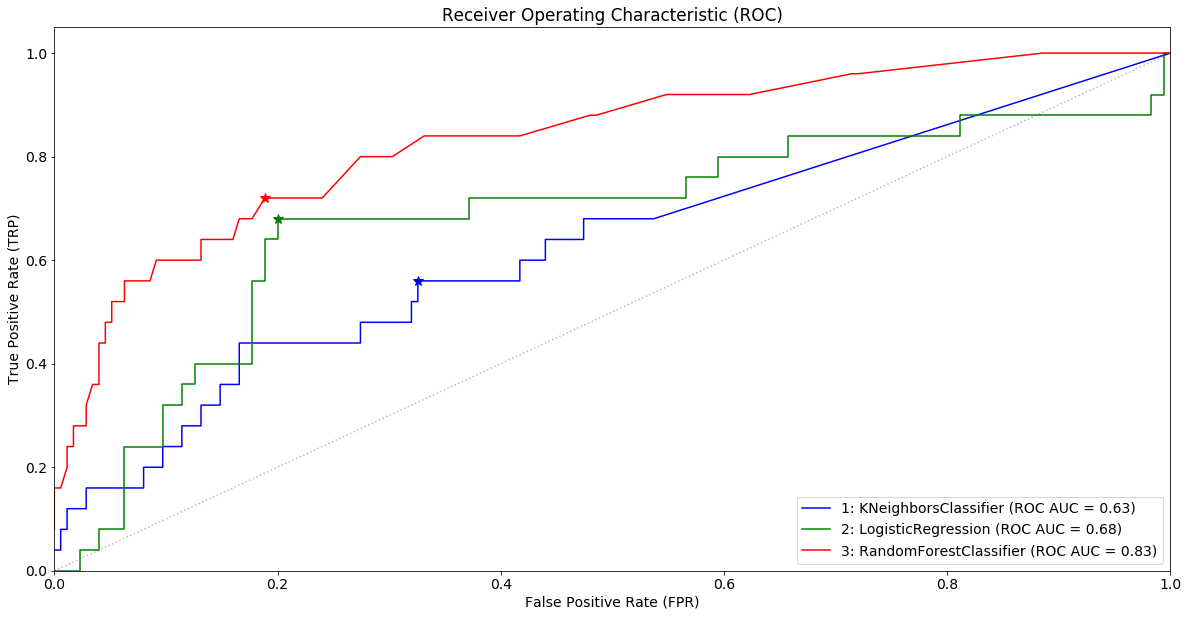

In [13]:
# Create a ROC plot that compares them.
tsm_plots.tsm_classification_comparison_plots(
    trained_supervised_models=models_to_compare,
    plot_type='ROC',
    save=False)

### Plot PR Curve to compare all models

The precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results.

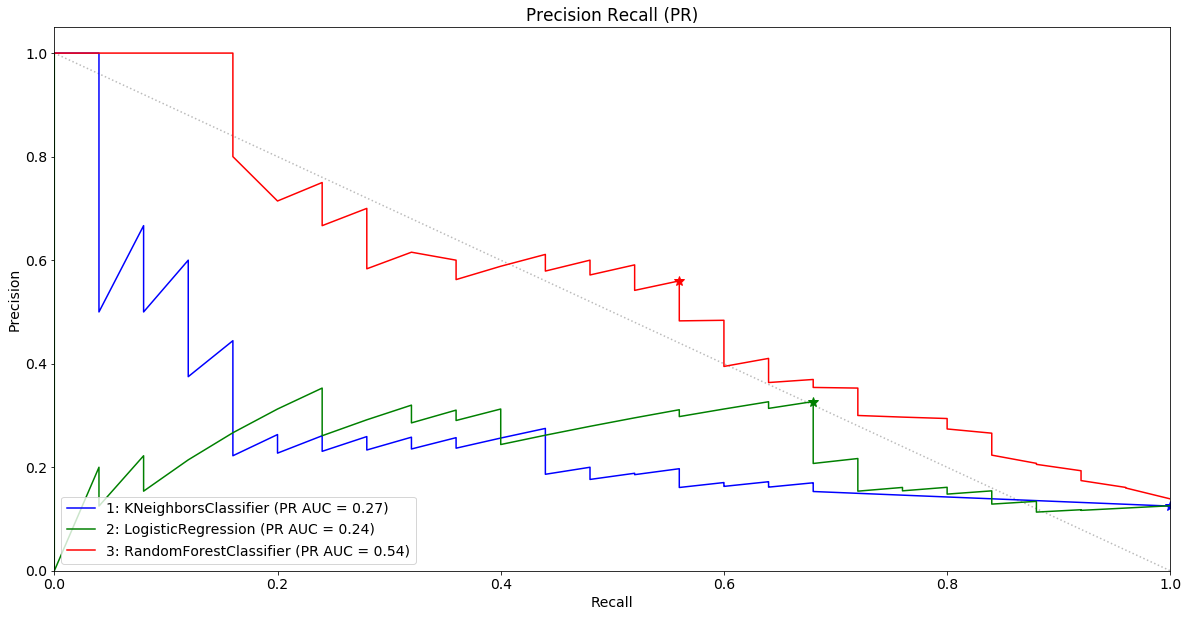

In [15]:
# Create a ROC plot that compares them.
tsm_plots.tsm_classification_comparison_plots(
    trained_supervised_models=models_to_compare,
    plot_type='PR',
    save=False)

## Step 5: Save the model

Once you are happy with the performance of a model, you can save it for use later in predicting new data. 

Filenames are timestamped and look like '2017-05-31T12-36-21_classification_RandomForestClassifier.pkl')

In [ ]:
# trained_random_forest.save()

## Step 6: Use the model to make predictions

### Load new data that needs predictions

In [16]:
prediction_dataframe = healthcareai.load_diabetes()
prediction_dataframe.drop(['ThirtyDayReadmitFLG'], axis=1, inplace=True)
prediction_dataframe.head()

,PatientEncounterID,PatientID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG
0,1,10001,167.0,195.0,4.2,M
1,2,10001,153.0,214.0,5.0,M
2,3,10001,170.0,191.0,4.0,M
3,4,10002,187.0,135.0,4.4,M
4,5,10002,188.0,125.0,4.3,M


### Make predictions on new data and return predictions only

In [17]:
predictions = trained_random_forest.make_predictions(prediction_dataframe)
predictions.head()

,PatientEncounterID,Prediction
0,1,0.02
1,2,0.03
2,3,0.02
3,4,0.00
4,5,0.00


### Make predictions on new data and return the top factors

In [18]:
factors = trained_random_forest.make_factors(prediction_dataframe, number_top_features=3)
factors.head()

,PatientEncounterID,Factor1TXT,Factor2TXT,Factor3TXT
0,1,A1CNBR,LDLNBR,SystolicBPNBR
1,2,A1CNBR,LDLNBR,SystolicBPNBR
2,3,A1CNBR,LDLNBR,SystolicBPNBR
3,4,A1CNBR,LDLNBR,SystolicBPNBR
4,5,A1CNBR,LDLNBR,SystolicBPNBR


### Make predictions on new data and return predictions with top factors

In [19]:
predictions_with_factors_df = trained_random_forest.make_predictions_with_k_factors(
    prediction_dataframe,
    number_top_features=3)

predictions_with_factors_df.head()

,PatientEncounterID,Factor1TXT,Factor2TXT,Factor3TXT,Prediction
0,1,A1CNBR,LDLNBR,SystolicBPNBR,0.02
1,2,A1CNBR,LDLNBR,SystolicBPNBR,0.03
2,3,A1CNBR,LDLNBR,SystolicBPNBR,0.02
3,4,A1CNBR,LDLNBR,SystolicBPNBR,0.00
4,5,A1CNBR,LDLNBR,SystolicBPNBR,0.00


### Make predictions on new data and return original data set with predictions and top factors

In [20]:
original_plus_predictions_and_factors = trained_random_forest.make_original_with_predictions_and_factors(
    prediction_dataframe, 
    number_top_features=3)

original_plus_predictions_and_factors.head()

,PatientEncounterID,PatientID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,PatientEncounterID,Factor1TXT,Factor2TXT,Factor3TXT,Prediction
0,1,10001,167.0,195.0,4.2,M,1,A1CNBR,LDLNBR,SystolicBPNBR,0.02
1,2,10001,153.0,214.0,5.0,M,2,A1CNBR,LDLNBR,SystolicBPNBR,0.03
2,3,10001,170.0,191.0,4.0,M,3,A1CNBR,LDLNBR,SystolicBPNBR,0.02
3,4,10002,187.0,135.0,4.4,M,4,A1CNBR,LDLNBR,SystolicBPNBR,0.00
4,5,10002,188.0,125.0,4.3,M,5,A1CNBR,LDLNBR,SystolicBPNBR,0.00


### Compare our predictions with our original results to see how we did

In [21]:
compare_df = dataframe.merge(predictions, 'outer', 'PatientEncounterID')
compare_df["PredictionFLG"] = compare_df["Prediction"].apply(lambda v: 'Y' if v > .5 else 'N')
compare_df['Comparison'] = (compare_df['ThirtyDayReadmitFLG'] + '/' + compare_df['PredictionFLG'])
compare_df.groupby('Comparison').count().iloc[:,:1]

,PatientEncounterID
Comparison,
N/N,828
N/Y,8
Y/N,18
Y/Y,136


## Step 7: Save your predictions

### Save to CSV

In [ ]:
# predictions.to_csv('ClinicalPredictions.csv')

### Save to database

In [ ]:
# engine = hcai_db.build_mssql_engine_using_trusted_connections(
#    server='localhost', 
#    database='Clinical')

# predictions.to_sql(table='DiabetesPredictions', engine=engine)